# A3Q4: Fox Chasing a Rabbit

In [1]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# If you plan to use your own MyODE code, paste your code here.

## Set up the rabbit's trajectory, `rabbit`

In [3]:
# This code doesn't concern you. Look away!
from scipy.interpolate import interp1d

c = np.array([[1.4, 1.8, 2.6, 3.5, 4.4, 5.7, 6.9, 7.9, 8.9, 9.7, 9.2, 8.5, 7.9,
        7.6, 7.4, 7.7, 8.2],
       [2.2, 1.8, 1.5, 1.2, 0.9, 1. , 1.3, 1.4, 1.2, 1.4, 2.1, 2.6, 3.1,
        3.5, 4.7, 5.9, 6.6]])*3.
knots = np.array([ 0.        ,  0.56568542,  1.4200858 ,  2.3687691 ,  3.3174524 ,
        4.62129288,  5.85822456,  6.86321213,  7.88301603,  8.70763715,
        9.56786968, 10.42810221, 11.20912718, 11.70912718, 12.92567968,
       14.16261137, 15.0228439])

rabbit = lambda t: np.array([interp1d(knots, c[0,:])(t), interp1d(knots, c[1,:])(t)])

In [4]:
rabbit(0.18)
# Returns the (x,y) coords of the rabbit at time t.

array([4.58183767, 6.21816233])

## (a) Derive 1st-order System of DEs

We are given the 2nd-order system,
\begin{align}
f_x'' &= A \frac{a_x}{\| {\bf a} \|} - \left(\big\| ( f_x', f_y' ) \big\| -S \right) f_x' \\
f_y'' &= A \frac{a_y}{\| {\bf a} \|} - \left(\big\| (f_x', f_y') \big\| -S \right) f_y'
\end{align}

**YOUR SOLUTION HRERE**

\begin{align}
\text{Let }z=\begin{bmatrix} z_1 \\z_2 \\z_3 \\z_4\end{bmatrix} 
=\begin{bmatrix} f_x \\ f_y \\f_x' \\f_y'\end{bmatrix}\\
\end{align}

Thus,

\begin{align}
\frac{d}{dt}z=
\begin{bmatrix} 
z_3 \\ 
z_4 \\
A \frac{a_x}{\| {\bf a} \|} - \left(\big\| ( z_3, z_4 ) \big\| -S \right) z_3 \\
A \frac{a_y}{\| {\bf a} \|} - \left(\big\| (z_3, z_4) \big\| -S \right) z_4
\end{bmatrix}
\end{align}

Which is our new first-order differential equations system

## (b) Dynamics function

In [5]:
def fox(t, z, S, A):
    
    #=== YOUR CODE HERE ===
    rabbit_loc = rabbit(t)
    ax = rabbit_loc[0] - z[0]
    ay = rabbit_loc[1] - z[1]
    dzdt_2 = A / np.linalg.norm([ax, ay]) * ax - (np.linalg.norm([z[2], z[3]])-S)*z[2]
    dzdt_3 = A / np.linalg.norm([ax, ay]) * ay - (np.linalg.norm([z[2], z[3]])-S)*z[3]
    
    dzdt = [z[2], z[3], dzdt_2, dzdt_3]
    # dzdt = 0.  # Replace this line
    return dzdt


## (c) Events Functions

In [24]:
# (i) Capture
def capture(t, z):
    
    #=== YOUR CODE HERE ===
    rabbit_loc = rabbit(t)
    ax = rabbit_loc[0] - z[0]
    ay = rabbit_loc[1] - z[1]
    v = np.linalg.norm([ax, ay]) - 0.1
    #v = 1.  # replace this line
    return v

capture.terminal = True
capture.direction = 0

# (ii) Electric Fence
def fence(t, z):
    
    #=== YOUR CODE HERE ===
    v = z[0] - 30
    #v = 1.  # replace this line
    return v

fence.terminal = True
fence.direction = 0



## (d) Simulations (using `MyODE` or `solve_ivp`)

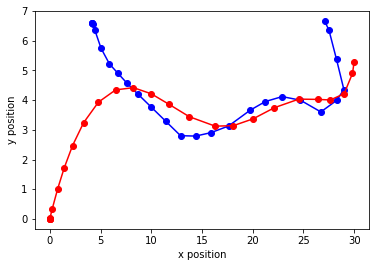

In [25]:
# Fox hits the fence

S = 2.4
A = 4
tspan = [0, 15]
y0 = [0, 0, 0, 0]
fun = lambda t,x: fox(t,x,S,A)
fox_loc = solve_ivp(fun, tspan, y0, events=[capture, fence])

t = fox_loc.t
rabbit_x = [0]*len(t)
rabbit_y = [0]*len(t)
for i in range(len(t)):
    rabbit_x[i] = rabbit(t[i])[0]
    rabbit_y[i] = rabbit(t[i])[1]


plt.plot(rabbit_x, rabbit_y, 'bo-');
plt.plot(fox_loc.y[0], fox_loc.y[1], 'ro-');
plt.xlabel('x position')
plt.ylabel('y position');




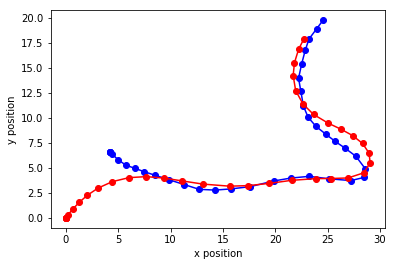

In [26]:
# Rabbit escapes
# Fox hits the fence

S = 2
A = 4.4
tspan = [0, 15]
y0 = [0, 0, 0, 0]
fun = lambda t,x: fox(t,x,S,A)
fox_loc = solve_ivp(fun, tspan, y0, events=[capture, fence])

t = fox_loc.t
rabbit_x = [0]*len(t)
rabbit_y = [0]*len(t)
for i in range(len(t)):
    rabbit_x[i] = rabbit(t[i])[0]
    rabbit_y[i] = rabbit(t[i])[1]


plt.plot(rabbit_x, rabbit_y, 'bo-');
plt.plot(fox_loc.y[0], fox_loc.y[1], 'ro-');
plt.xlabel('x position')
plt.ylabel('y position');



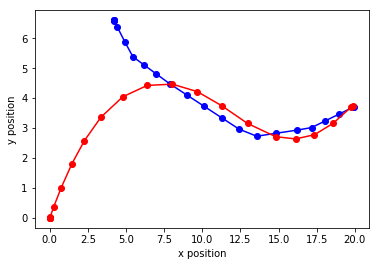

In [27]:
# Fox captures the rabbit
# Fox hits the fence

S = 2.5
A = 7
tspan = [0, 15]
y0 = [0, 0, 0, 0]
fun = lambda t,x: fox(t,x,S,A)
fox_loc = solve_ivp(fun, tspan, y0, events=[capture, fence])

t = fox_loc.t
rabbit_x = [0]*len(t)
rabbit_y = [0]*len(t)
for i in range(len(t)):
    rabbit_x[i] = rabbit(t[i])[0]
    rabbit_y[i] = rabbit(t[i])[1]


plt.plot(rabbit_x, rabbit_y, 'bo-');
plt.plot(fox_loc.y[0], fox_loc.y[1], 'ro-');
plt.xlabel('x position')
plt.ylabel('y position');

